# Medical Chatbot - Symptobot
## Project Overview
This project aims to develop a fully functional end-to-end medical chatbot using Natural Language Processing (NLP) techniques. The chatbot is designed to interact with users, understand their medical queries, and provide relevant and informative responses.

## Objectives:
User Interaction: Allow users to ask medical-related questions in natural language and receive accurate responses.
Natural Language Understanding: Utilize NLP models to interpret and process user queries.
Medical Information Retrieval: Access a medical knowledge base to provide up-to-date and precise responses.

## Technologies Used:
Language Models: Integration of advanced NLP models for text understanding and generation.
Vector Database: Efficient storage and retrieval of medical information.
Web Framework: Development of an interactive user interface for seamless chatbot interaction.

Source : https://github.com/shsarv/Machine-Learning-Projects/tree/main/Medical%20Chatbot%20%5BEND%202%20END%5D%20%5BNLP%5D

## Natural Language Processing (NLP)

- this part of the notebook depicts the data preparation, but also the training of the NLP model, as well as the neural network validation 
- the data for the NLP model is loaded from the _intents_short.json_ file

In [1]:
import json

with open('intents_short.json', 'r') as f:
    intents = json.load(f)
    
intents

{'intents': [{'tag': 'abdominal_pain',
   'patterns': ['abdominal pain',
    'abdomen hurts',
    'pain in stomach',
    'pain in abdomen']},
  {'tag': 'abnormal_menstruation',
   'patterns': ['abnormal menstruation',
    'heavy period',
    'Heavy flow',
    'Period lasts longer',
    'period painful',
    'strong menstrual pain',
    'Menstrual cramps strong']},
  {'tag': 'acidity',
   'patterns': ['acid reflux', 'acidity problems', 'heartburn']},
  {'tag': 'acute_liver_failure',
   'patterns': ['acute liver failure',
    'liver hurts',
    'pain around liver',
    'Upper right abdomen hurts']},
  {'tag': 'altered_sensorium',
   'patterns': ['altered sensorium',
    "can't think clearly",
    'hard to think',
    'unable to concentrate']},
  {'tag': 'anxiety',
   'patterns': ['anxiety', 'anxious', 'really worried', 'nervous']},
  {'tag': 'back_pain',
   'patterns': ['back hurts', 'back pain', 'pain in back']},
  {'tag': 'belly_pain',
   'patterns': ['belly hurts',
    'belly pain',
 

In [2]:
all_words = []
tags = []
xy = []

In [3]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\natha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import nltk

for intent in intents['intents']:
    tag = intent['tag']
    tags.append(tag)
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        all_words.extend(w)
        xy.append( (w, tag) )

In [5]:
xy

[(['abdominal', 'pain'], 'abdominal_pain'),
 (['abdomen', 'hurts'], 'abdominal_pain'),
 (['pain', 'in', 'stomach'], 'abdominal_pain'),
 (['pain', 'in', 'abdomen'], 'abdominal_pain'),
 (['abnormal', 'menstruation'], 'abnormal_menstruation'),
 (['heavy', 'period'], 'abnormal_menstruation'),
 (['Heavy', 'flow'], 'abnormal_menstruation'),
 (['Period', 'lasts', 'longer'], 'abnormal_menstruation'),
 (['period', 'painful'], 'abnormal_menstruation'),
 (['strong', 'menstrual', 'pain'], 'abnormal_menstruation'),
 (['Menstrual', 'cramps', 'strong'], 'abnormal_menstruation'),
 (['acid', 'reflux'], 'acidity'),
 (['acidity', 'problems'], 'acidity'),
 (['heartburn'], 'acidity'),
 (['acute', 'liver', 'failure'], 'acute_liver_failure'),
 (['liver', 'hurts'], 'acute_liver_failure'),
 (['pain', 'around', 'liver'], 'acute_liver_failure'),
 (['Upper', 'right', 'abdomen', 'hurts'], 'acute_liver_failure'),
 (['altered', 'sensorium'], 'altered_sensorium'),
 (['ca', "n't", 'think', 'clearly'], 'altered_sensori

In [6]:
# synthetic dataset created for neural network validation
xy_test = [
    (['ca', "n't", 'think', 'straight'], 'altered_sensorium'),
    (['suffer', 'from', 'anxeity'], 'anxiety'),
    (['suffer', 'from', 'anxeity'], 'anxiety'),
    (['bloody', 'poop'], 'bloody_stool'),
    (['blurred', 'vision'], 'blurred_and_distorted_vision'),
    (['ca', "n't", 'breathe'], 'breathlessness'),
    (['Yellow', 'liquid', 'pimple'], 'yellow_crust_ooze'),
    (['lost', 'weight'], 'weight_loss'),
    (['side', 'weaker'], 'weakness_of_one_body_side'),
    (['watering', 'eyes'], 'watering_from_eyes'),
    (['brief', 'blindness'], 'visual_disturbances'),
    (['throat', 'hurts'], 'throat_irritation'),
    (['extremities', 'swelling'], 'swollen_extremeties'),
    (['swollen', 'lymph', 'nodes'], 'swelled_lymph_nodes'),
    (['dark', 'under', 'eyes'], 'sunken_eyes'),
    (['stomach', 'blood'], 'stomach_bleeding'),
    (['blood', 'urine'], 'spotting_urination'),
    (['sinuses', 'hurt'], 'sinus_pressure'),
    (['watery', 'from', 'nose'], 'runny_nose'),
    (['have', 'to', 'move'], 'restlessness'),
    (['red', 'patches', 'body'], 'red_spots_over_body'),
    (['sneeze'], 'continuous_sneezing'),
    (['coughing'], 'cough'),
    (['skin', 'patches'], 'dischromic_patches'),
    (['skin', 'bruised'], 'bruising'),
    (['burning', 'pee'], 'burning_micturition'),
    (['hurts', 'pee'], 'burning_micturition'),
    (['Burning', 'sensation'], 'burning_micturition'),
    (['chest', 'pressure'], 'chest_pain'),
    (['pain', 'butt'], 'pain_in_anal_region'),
    (['heart', 'bad', 'beat'], 'palpitations'),
    (['fart', 'lot'], 'passage_of_gases'),
    (['cough', 'phlegm'], 'phlegm'),
    (['lot', 'urine'], 'polyuria'),
    (['Veins', 'bigger'], 'prominent_veins_on_calf'),
    (['Veins', 'emphasized'], 'prominent_veins_on_calf'),
    (['yellow', 'pimples'], 'pus_filled_pimples'),
    (['red', 'nose'], 'red_sore_around_nose'),
    (['skin', 'yellow'], 'yellowish_skin'),
    (['eyes', 'yellow'], 'yellowing_of_eyes'),
    (['large', 'thyroid'], 'enlarged_thyroid'),
    (['really', 'hunger'], 'excessive_hunger'),
    (['always', 'hungry'], 'excessive_hunger'),
]

In [7]:
len(xy_test)

43

In [8]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

ignore_words = ['?', '!', '.', ',']
all_words = [stemmer.stem(w.lower()) for w in all_words if w not in ignore_words]
all_words = sorted(set(all_words))
all_words

['a',
 'abdomen',
 'abdomin',
 'abnorm',
 'ach',
 'acid',
 'acn',
 'acut',
 'affair',
 'alcohol',
 'all',
 'also',
 'alter',
 'alway',
 'am',
 'anal',
 'and',
 'ankl',
 'annoy',
 'anu',
 'anxieti',
 'anxiou',
 'anyth',
 'appetit',
 'are',
 'arm',
 'around',
 'at',
 'atrophi',
 'attack',
 'back',
 'bad',
 'bag',
 'balanc',
 'beat',
 'befor',
 'behind',
 'belli',
 'between',
 'bigger',
 'blackhead',
 'bladder',
 'bleed',
 'blind',
 'blister',
 'bloat',
 'blood',
 'bloodi',
 'blue',
 'blur',
 'blurri',
 'bodi',
 'breath',
 'breathless',
 'brief',
 'bright',
 'brittl',
 'broken',
 'brown',
 'bruis',
 'bump',
 'burn',
 'burp',
 'butt',
 'ca',
 'calm',
 'caugh',
 'chang',
 'chest',
 'chill',
 'circl',
 'clearli',
 'cold',
 'color',
 'coma',
 'comfort',
 'concentr',
 'congest',
 'constantli',
 'constip',
 'consumpt',
 'contact',
 'continu',
 'cough',
 'cramp',
 'crust',
 'dark',
 'darker',
 'deep',
 'dehydr',
 'dent',
 'depress',
 'diarrhoea',
 'differ',
 'difficulti',
 'dischrom',
 'discomfo

In [9]:
tags = sorted(set(tags))
tags

['abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic_patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_ofurine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irregular_sugar

- for better understanding, an example is given:
     - set of all words is defined as (i, you, he, she, we, they)
     - the sentence is given: "I am pondering while they are sleeping"
     - from that sencence, a bag of words in generated: (1, 0, 0, 0, 0, 1)
         - in that sentence, there are two words from the set of all words - _i_ and _they_
         - a 1 is put in the place of those words in the set of all words and a 0 everywhere else
- in case of the _bag\_of\_words_ method, a bag is initially filled with zeros (the length of the bag is always equal to the length of the set of all words)
- in the initialized bag of words, the 1's are placeon the indexes of those the words from set of all words that appear in the given sentence 

```python
import numpy as np
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

def bag_of_words(tokenized_sentence, all_words):
    tokenized_sentence = [stemmer.stem(w.lower()) for w in tokenized_sentence]
    
    bag = np.zeros(len(all_words), dtype=np.float32)
    for idx, w in enumerate(all_words):
        if w in tokenized_sentence:
            bag[idx] = 1.0
    
    return bag
```

In [10]:
#Example of method bag_of_words

import numpy as np
from nltk_utils import bag_of_words

sentence = ['hello', 'how', 'are', 'you']
words = ['hi', 'hello', 'I', 'you', 'bye', 'thanks', 'cool']
bag_of_words(sentence, words)

array([0., 1., 0., 1., 0., 0., 0.], dtype=float32)

In [11]:
X_train = []
y_train = []

for (pattern, tag) in xy:
    bag = bag_of_words(pattern, all_words)
    X_train.append(bag)
    
    label = tags.index(tag)
    y_train.append(label) 
    
X_train = np.array(X_train)
y_train = np.array(y_train)

In [12]:
X_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_train

array([  0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   1,   2,   2,
         2,   3,   3,   3,   3,   4,   4,   4,   4,   5,   5,   5,   5,
         6,   6,   6,   7,   7,   7,   7,   7,   8,   8,   8,   8,   9,
         9,   9,   9,  10,  10,  10,  10,  11,  11,  11,  12,  12,  12,
        13,  13,  13,  13,  13,  14,  14,  14,  14,  14,  15,  15,  15,
        15,  16,  16,  16,  16,  17,  17,  17,  17,  18,  18,  18,  19,
        19,  20,  20,  20,  20,  20,  21,  21,  21,  23,  23,  23,  23,
        24,  24,  24,  24,  25,  25,  25,  25,  25,  26,  26,  26,  26,
        26,  22,  22,  22,  22,  22,  27,  27,  28,  28,  28,  29,  29,
        30,  30,  30,  31,  31,  31,  31,  32,  32,  32,  32,  33,  33,
        33,  33,  34,  34,  34,  34,  34,  34,  35,  35,  35,  35,  35,
        36,  36,  37,  37,  37,  37,  38,  38,  38,  39,  39,  39,  39,
        39,  40,  40,  40,  40,  41,  41,  41,  41,  42,  42,  42,  42,
        43,  43,  43,  43,  44,  44,  44,  44,  45,  45,  45,  4

In [14]:
X_test = []
y_test = []

for (pattern, tag) in xy_test:
    bag = bag_of_words(pattern, all_words)
    X_test.append(bag)
    
    label = tags.index(tag)
    y_test.append(label) 
    
X_test = np.array(X_test)
y_test = np.array(y_test)

In [15]:
y_test

array([  4,   5,   5,  12,  13,  14, 127, 126, 124, 122, 120, 116, 114,
       110, 108, 106, 104,  98,  93,  92,  90,  25,  26,  32,  16,  17,
        17,  17,  18,  77,  79,  80,  82,  83,  84,  84,  86,  89, 130,
       129,  36,  37,  37])

In [16]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [17]:
class ChatDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.n_samples = len(X_data)
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    
    def __len__(self):
        return  self.n_samples

```python
import torch.nn as nn

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, num_classes)
        self.relu = nn.ReLU() 
        
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out
```

In [18]:
from nnet import NeuralNet
from sklearn.metrics import accuracy_score

batch_size = 8
hidden_size = 8
output_size = len(tags) 
input_size = len(all_words)
learning_rates = [0.01, 0.05, 0.1, 0.15]
num_epochs = 1000

def nn_validation():
    dataset_train = ChatDataset(X_train, y_train)
    
    train_loader = DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True, num_workers=0)
    
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
 
    model = NeuralNet(input_size, hidden_size, output_size).to(device)

    loss_train = []
    loss_test = []
    
    for lr in learning_rates:
        # loss and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.ASGD(model.parameters(), lr=lr)

        print(f"lr: {lr}, train")
        for epoch in range(num_epochs):
            
            for (words, labels) in train_loader:
                words = words.to(device)
                labels = labels.to(device)

                outputs = model(words)
                loss = criterion(outputs, labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            if (epoch + 1) % (num_epochs / 2) == 0:
                print(f'epoch {epoch + 1}/{num_epochs}, loss = {loss.item():.4f}')

        print(f'final loss = {loss.item():.4f}')
        loss_train.append(loss.item())
        
        y_predicted = []
        
        for x in X_test:
            
            x = x.reshape(1, x.shape[0])
            x = torch.from_numpy(x)

            output = model(x)
            _, predicted = torch.max(output, dim=1)
            y_pred = predicted.item()
            y_predicted.append(y_pred)
            
        
        print("y_predicted:", y_predicted)
        y_predicted = np.array(y_predicted)
        
        loss_test.append(accuracy_score(y_test, y_predicted))
        print()
    
    return loss_train, loss_test

In [19]:
train_errors, test_errors = nn_validation()

lr: 0.01, train
epoch 500/1000, loss = 0.3158
epoch 1000/1000, loss = 0.0224
final loss = 0.0224
y_predicted: [106, 27, 27, 31, 120, 22, 62, 126, 59, 122, 120, 81, 94, 110, 108, 106, 83, 98, 93, 66, 90, 25, 26, 32, 16, 17, 75, 126, 18, 77, 52, 27, 10, 83, 84, 34, 40, 89, 130, 129, 36, 37, 37]

lr: 0.05, train
epoch 500/1000, loss = 0.0097
epoch 1000/1000, loss = 0.0095
final loss = 0.0095
y_predicted: [106, 27, 27, 31, 13, 22, 62, 126, 59, 122, 119, 81, 94, 110, 108, 44, 104, 98, 93, 66, 90, 25, 26, 32, 16, 17, 104, 126, 18, 77, 52, 27, 10, 83, 84, 61, 2, 59, 130, 129, 36, 37, 37]

lr: 0.1, train
epoch 500/1000, loss = 0.0068
epoch 1000/1000, loss = 0.0138
final loss = 0.0138
y_predicted: [106, 27, 27, 44, 13, 22, 32, 126, 59, 122, 34, 81, 119, 110, 108, 44, 104, 98, 93, 92, 90, 25, 26, 32, 16, 17, 17, 126, 18, 77, 52, 27, 82, 83, 34, 34, 2, 89, 130, 129, 36, 37, 37]

lr: 0.15, train
epoch 500/1000, loss = 0.0153
epoch 1000/1000, loss = 0.0087
final loss = 0.0087
y_predicted: [106, 53,

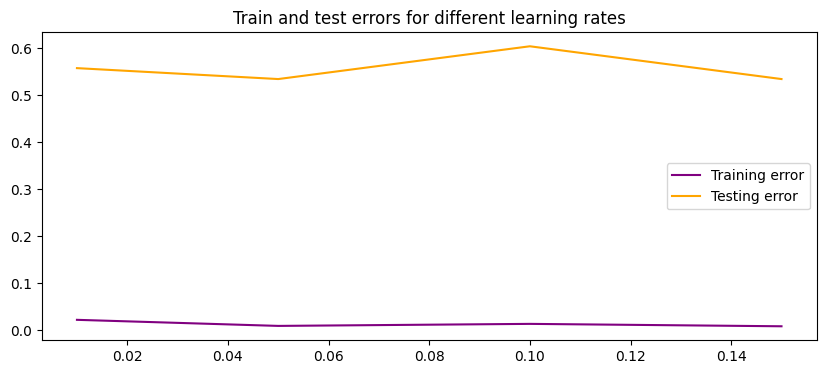

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))

plt.title("Train and test errors for different learning rates")
plt.plot(learning_rates, train_errors, c='purple', label='Training error')
plt.plot(learning_rates, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [21]:
from nnet import NeuralNet

batch_size = 8
hidden_size = 8
output_size = len(tags) 
input_size = len(all_words)
learning_rate = 0.01
num_epochs = 100

dataset = ChatDataset(X_train, y_train)
train_loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, num_workers=0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
model = NeuralNet(input_size, hidden_size, output_size).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.ASGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for (words, labels) in train_loader:
        words = words.to(device)
        labels = labels.to(device)
        
        outputs = model(words)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    if (epoch + 1) % (num_epochs / 10) == 0:
        print(f'epoch {epoch + 1}/{num_epochs}, loss = {loss.item():.4f}')

print(f'final loss = {loss.item():.4f}')

epoch 10/100, loss = 4.8655
epoch 20/100, loss = 5.0300
epoch 30/100, loss = 4.9805
epoch 40/100, loss = 4.7107
epoch 50/100, loss = 4.9311
epoch 60/100, loss = 4.5778
epoch 70/100, loss = 4.8263
epoch 80/100, loss = 4.8829
epoch 90/100, loss = 4.7246
epoch 100/100, loss = 4.9814
final loss = 4.9814


In [22]:
data = {
    "model_state": model.state_dict(),
    "input_size": input_size,
    "output_size": output_size,
    "hidden_size": hidden_size,
    "all_words": all_words,
    "tags": tags
}

FILE = "models/data.pth"
torch.save(data, FILE)

### Symptom prediction

In [23]:
sentence = "My head hurts"
sentence = nltk.word_tokenize(sentence)
X = bag_of_words(sentence, all_words)
X = X.reshape(1, X.shape[0])
X = torch.from_numpy(X)

output = model(X)
_, predicted = torch.max(output, dim=1)
tag = tags[predicted.item()]

probs = torch.softmax(output, dim=1)
prob = probs[0][predicted.item()]

print("prob:", prob)

tag

prob: tensor(0.0138, grad_fn=<SelectBackward0>)


'swollen_extremeties'

## Transforming disease data

This part of the notebook shows the transformations over data related to diseases and symptoms. For each unique symptom, a new column was created in the dataframe. If symptom is typical for a paticular disease, then the column related to that symptom is set to 1, and otherwise to 0.

In [24]:
import pandas as pd
import numpy as np
import sklearn
import pickle
import matplotlib.pyplot as plt

In [25]:
print('a')

a


In [26]:
df = pd.read_csv("data/dataset.csv")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [28]:
df = df.drop_duplicates()

In [29]:
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,Impetigo,high_fever,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,Impetigo,skin_rash,blister,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,Impetigo,skin_rash,high_fever,red_sore_around_nose,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,Impetigo,skin_rash,high_fever,blister,yellow_crust_ooze,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
symptoms = np.concatenate((df.Symptom_1.unique(), df.Symptom_2.unique(), df.Symptom_3.unique(), df.Symptom_4.unique(), 
                          df.Symptom_5.unique(), df.Symptom_6.unique(), df.Symptom_7.unique(), df.Symptom_8.unique(), 
                          df.Symptom_9.unique(), df.Symptom_10.unique(), df.Symptom_11.unique(), df.Symptom_12.unique(), 
                          df.Symptom_13.unique(), df.Symptom_14.unique(), df.Symptom_15.unique(), df.Symptom_16.unique(), 
                          df.Symptom_17.unique()))

In [31]:
symptoms_unique = list((set(symptoms)))

In [32]:
len(symptoms_unique)

132

In [33]:
i = 18
for each in symptoms_unique:
    df.insert(i, each, 0)
    i = i + 1

C:\Users\natha\AppData\Local\Temp\ipykernel_1920\3014912638.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(i, each, 0)
C:\Users\natha\AppData\Local\Temp\ipykernel_1920\3014912638.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.insert(i, each, 0)
C:\Users\natha\AppData\Local\Temp\ipykernel_1920\3014912638.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(

In [34]:
df = df.fillna(0)

In [35]:
for index, row in df.iterrows(): 
    disease_symptoms = [symptom for symptom in list(row)[1:] if symptom != 0]
    for each in disease_symptoms: 
        df.at[index, each] = 1

In [36]:
df = df.drop(columns = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 
             'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16'
             , 'Symptom_17'])

In [37]:
df = df.loc[:, df.columns.notnull()]
df.columns = df.columns.str.replace(' ', '')
df = df.reindex(sorted(df.columns), axis=1)

In [38]:
list(df.columns)

['Disease',
 'abdominal_pain',
 'abnormal_menstruation',
 'acidity',
 'acute_liver_failure',
 'altered_sensorium',
 'anxiety',
 'back_pain',
 'belly_pain',
 'blackheads',
 'bladder_discomfort',
 'blister',
 'blood_in_sputum',
 'bloody_stool',
 'blurred_and_distorted_vision',
 'breathlessness',
 'brittle_nails',
 'bruising',
 'burning_micturition',
 'chest_pain',
 'chills',
 'cold_hands_and_feets',
 'coma',
 'congestion',
 'constipation',
 'continuous_feel_of_urine',
 'continuous_sneezing',
 'cough',
 'cramps',
 'dark_urine',
 'dehydration',
 'depression',
 'diarrhoea',
 'dischromic_patches',
 'distention_of_abdomen',
 'dizziness',
 'drying_and_tingling_lips',
 'enlarged_thyroid',
 'excessive_hunger',
 'extra_marital_contacts',
 'family_history',
 'fast_heart_rate',
 'fatigue',
 'fluid_overload',
 'foul_smell_ofurine',
 'headache',
 'high_fever',
 'hip_joint_pain',
 'history_of_alcohol_consumption',
 'increased_appetite',
 'indigestion',
 'inflammatory_nails',
 'internal_itching',
 'irr

## Description, Precaution and Symptom Severity data

In [39]:
diseases_description = pd.read_csv("data/symptom_Description.csv")
diseases_description['Disease'] = diseases_description['Disease'].apply(lambda x: x.lower().strip(" "))

In [40]:
disease_precaution = pd.read_csv("data/symptom_precaution.csv")
disease_precaution['Disease'] = disease_precaution['Disease'].apply(lambda x: x.lower().strip(" "))

In [41]:
disease_precaution

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,drug reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,allergy,apply calamine,cover area with bandage,keep a diary,use ice to compress itching
3,hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths
5,gerd,avoid fatty spicy food,avoid lying down after eating,maintain healthy weight,exercise
6,chronic cholestasis,cold baths,anti itch medicine,consult doctor,eat healthy
7,hepatitis a,Consult nearest hospital,wash hands through,avoid fatty spicy food,medication
8,osteoarthristis,acetaminophen,consult nearest hospital,follow up,salt baths
9,(vertigo) paroymsal positional vertigo,lie down,avoid sudden change in body,avoid abrupt head movment,relax


In [42]:
symptom_severity = pd.read_csv("data/Symptom-severity.csv")
symptom_severity = symptom_severity.applymap(lambda s: s.lower().strip(" ").replace(" ", "") if type(s) == str else s)

C:\Users\natha\AppData\Local\Temp\ipykernel_1920\1098191717.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  symptom_severity = symptom_severity.applymap(lambda s: s.lower().strip(" ").replace(" ", "") if type(s) == str else s)


## Building the machine learning models

In [43]:
labels = df.to_numpy()[:, :1]
examples = df.to_numpy()[:, 1:]
list_of_symptoms = list(df.columns)[1:]

with open('data/list_of_symptoms.pickle', 'wb') as data_file: 
    pickle.dump(list_of_symptoms, data_file)

print(len(labels))
print(len(examples))
print(len(list_of_symptoms))

304
304
131


In [44]:
#test example

symptoms = ['stomach_pain', 'headache'] 
x_test = []

with open('data/list_of_symptoms.pickle', 'rb') as data_file:
    symptoms_list = pickle.load(data_file)

for each in symptoms_list: 
    if each in symptoms:
        x_test.append(1)
    else: 
        x_test.append(0)

x_test = np.asarray(x_test) 

In [45]:
#Cross validation function

def cross_validation(X_train, y_train, X_test, y_test, model_name, parameter_range=50): 
    train_errors = []
    test_errors = []
    
    parameters = np.linspace(1, parameter_range, parameter_range, dtype=int)
    
    for parameter in parameters: 
        if model_name == 'knn':            
            model = KNeighborsClassifier(n_neighbors=parameter, metric='cosine')
        elif model_name == 'logreg':
            model = LogisticRegression(solver='liblinear', C=1/(parameter*20))
        elif model_name == 'dctree':
            model = DecisionTreeClassifier(splitter='random', max_depth=parameter)
        elif model_name =='svm': 
            model = SVC(C=1/(parameter*10))
            
        model.fit(X_train, y_train)
        learning_error = 1 - model.score(X_train, y_train) 
        testing_error = 1 - model.score(X_test, y_test)
        train_errors.append(learning_error)
        test_errors.append(testing_error)
    
    if model_name == 'logreg':
        best_parameter_value = 1/(parameters[np.argmin(test_errors)]*20)
    elif model_name == 'svm': 
        best_parameter_value = 1/(parameters[np.argmin(test_errors)]*10)
    else: 
        best_parameter_value = parameters[np.argmin(test_errors)]
    
    return parameters, best_parameter_value, train_errors, test_errors

In [46]:
#kNN algorithm

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6, metric='cosine')
X_train, X_test, y_train, y_test = train_test_split(examples, labels.ravel(), test_size=0.2)
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=6)

In [47]:
disease = knn.predict(x_test.reshape(1,-1))[0]
print(disease)

Paralysis (brain hemorrhage)


In [48]:
knn.score(X_test, y_test)

0.8360655737704918

In [49]:
#Additional information about disease and precautions

description = diseases_description.loc[diseases_description['Disease'] == disease.strip(" ").lower(), 'Description'].iloc[0]
print(description)

precaution = disease_precaution[disease_precaution['Disease'] == disease.strip(" ").lower()]
sentence = 'Precautions: ' + precaution.Precaution_1.iloc[0] + ", " + precaution.Precaution_2.iloc[0] + ", " + precaution.Precaution_3.iloc[0] + ", " + precaution.Precaution_4.iloc[0]
print(sentence)

Intracerebral hemorrhage (ICH) is when blood suddenly bursts into brain tissue, causing damage to your brain. Symptoms usually appear suddenly during ICH. They include headache, weakness, confusion, and paralysis, particularly on one side of your body.
Precautions: massage, eat healthy, exercise, consult doctor


In [50]:
#Giving the advice about seeing the doctor if any of the symptoms has severity larger than 5 or if mean of all the symptoms is larger than 4

symptoms = ['stomach_pain', 'headache', 'coma'] 
severity = []

for each in symptoms: 
    severity.append(symptom_severity.loc[symptom_severity['Symptom'] == each.lower().strip(" ").replace(" ", ""), 'weight'].iloc[0])

if np.mean(severity) > 4 or np.max(severity) > 5:
    print("Considering your symptoms are severe, and Meddy isn't a real doctor, you should consider talking to one. :)")

Considering your symptoms are severe, and Meddy isn't a real doctor, you should consider talking to one. :)


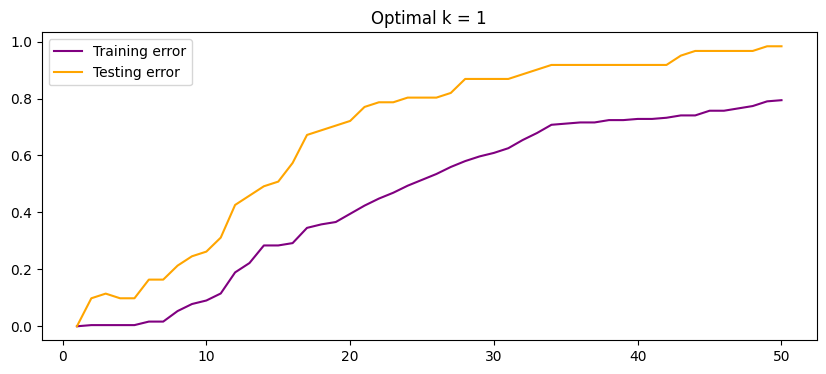

In [51]:
k_range = 20

fig = plt.figure(figsize=(10,4))


k, best_k, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='knn')
plt.title(f"Optimal k = {best_k}")
plt.plot(k, train_errors, c='purple', label='Training error')
plt.plot(k, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [52]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(splitter='random', max_depth=100)

dc_tree = clf.fit(X_train, y_train)
dc_tree.predict(x_test.reshape(1,-1))

array(['Drug Reaction'], dtype=object)

In [53]:
dc_tree.score(X_test, y_test)

0.5901639344262295

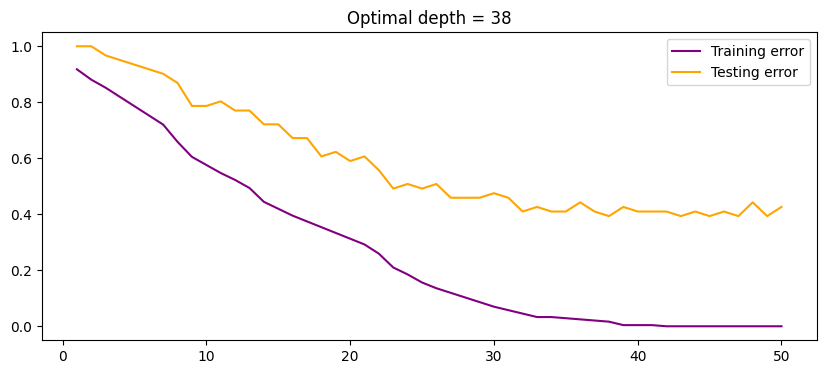

In [54]:
fig = plt.figure(figsize=(10,4))

depth, best_depth, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='dctree')
plt.title(f"Optimal depth = {best_depth}")
plt.plot(depth, train_errors, c='purple', label='Training error')
plt.plot(depth, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [55]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', C=0.05)

logreg.fit(X_train, y_train)
logreg.predict(x_test.reshape(1,-1))

array(['Migraine'], dtype=object)

In [56]:
print(logreg.score(X_test, y_test))

0.7868852459016393


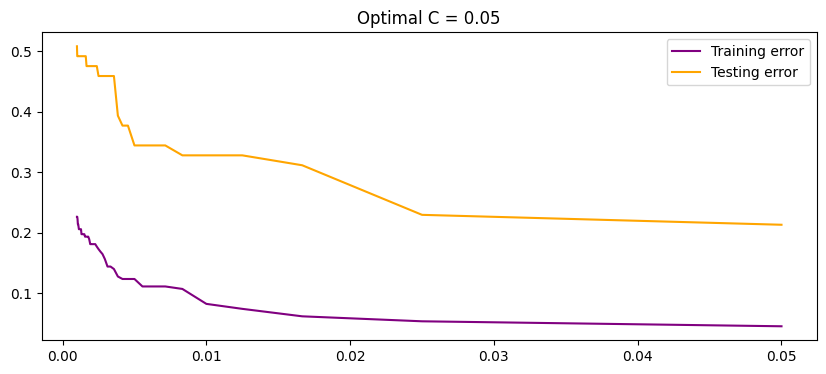

In [57]:
fig = plt.figure(figsize=(10,4))

c, best_c, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='logreg')
c_reg = []
for each in c: 
    c_reg.append(1/(each*20))
plt.title(f"Optimal C = {best_c}")
plt.plot(c_reg, train_errors, c='purple', label='Training error')
plt.plot(c_reg, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

In [58]:
#Support Vector Machine (SVM)

from sklearn.svm import SVC

svm = SVC(C=0.3)
svm.fit(X_train, y_train)
svm.predict(x_test.reshape(1,-1))

array(['(vertigo) Paroymsal  Positional Vertigo'], dtype=object)

In [59]:
print(svm.score(X_test, y_test))

0.6721311475409836


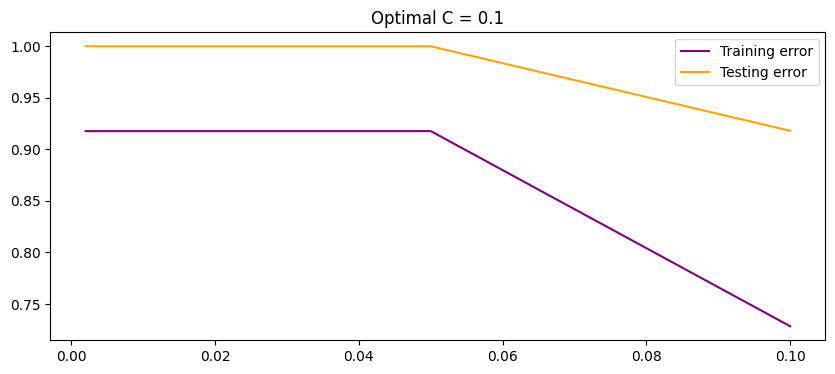

In [60]:
fig = plt.figure(figsize=(10,4))

c, best_c, train_errors, test_errors = cross_validation(X_train, y_train, X_test, y_test, model_name='svm')
c_reg = []
for each in c: 
    c_reg.append(1/(each*10))
plt.title(f"Optimal C = {best_c}")
plt.plot(c_reg, train_errors, c='purple', label='Training error')
plt.plot(c_reg, test_errors, c='orange', label='Testing error')
plt.legend()
        
plt.show()

## Ensemble learning

In [61]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
    
def get_stacking():
    level0 = list()
    level0.append(('lr', LogisticRegression(solver='liblinear', C=0.03)))
    level0.append(('knn', KNeighborsClassifier(n_neighbors=6, metric='cosine')))
    level0.append(('dctree', DecisionTreeClassifier(splitter='random', max_depth=34)))
    level0.append(('svm', SVC(C=0.1)))

    level1 = LogisticRegression()

    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return level0, model

lr 0.962714 (0.014065)
knn 1.000000 (0.000000)
dctree 0.607432 (0.039399)
svm 0.185246 (0.018835)
ensemble 0.789326 (0.072356)


C:\Users\natha\AppData\Local\Temp\ipykernel_1920\3242139226.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names, showmeans=True)


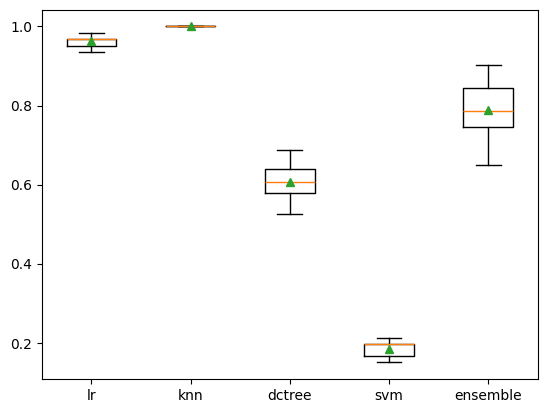

In [62]:
models, model = get_stacking()
results, names = list(), list()

for each in models:
    scores = evaluate_model(each[1], examples, labels)
    results.append(scores)
    names.append(each[0])
    print('%s %f (%f)' % (each[0], np.mean(scores), np.std(scores)))

ensemble_score = evaluate_model(model, examples, labels)
results.append(ensemble_score)
names.append('ensemble')
print('%s %f (%f)' % ('ensemble', np.mean(ensemble_score), np.std(ensemble_score)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [63]:
#Using pickle for dumping the model

model.fit(examples, labels.ravel())

with open('models/fitted_model.pickle2', 'wb') as modelFile:
    model_final = pickle.dump(model, modelFile)

with open('models/fitted_model.pickle2', 'rb') as modelFile:
    model_final = pickle.load(modelFile)

predicted = model_final.predict(x_test.reshape(1, -1))[0]
print(f'Predicted Class: {predicted}')

Predicted Class: Migraine


C:\Users\natha\OneDrive\Bureau\Chatbot\Machine-Learning-Projects\Medical_Chatbot_END2_END_NLP\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Additional information

In [64]:
#Condition number of X_train 

print(np.linalg.cond(examples.astype(int)))

3.905230667695863e+18


In [65]:
#Correlation matrix

plt.matshow(df.corr())
plt.show()

ValueError: could not convert string to float: 'Fungal infection'